# Notebook 5 - Property modeling with Chemical Checker Signatures
By Vincent Blay, November 2021

This notebooks illustrates one possible use of the recent [Chemical Checker signatures](https://www.nature.com/articles/s41467-021-24150-4) instead of molecular descriptors to model some of the properties in this work.

Chemical Checker signaturizers generate 128-D numerical vectors that can be used as conventional molecular descriptors. Each signaturizer is trained on a dataset of different nature. Around 800,000 small molecules and associated data were used in the construction of the Chemical Checker. Type I signatures are generated by applying Latent Semantic Indexing (LSI, a form of dimensionality reduction), to datasets of different nature. Type II signatures are then generated from type I signatures by emedding similarity networks generated from the type I signatures into 128 dimensions using *node2vec*.

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

%run "./plotting.py"

In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
from signaturizer import Signaturizer

## Research Octane Number (RON)

Let us load the data and look at the distribution:

In [4]:
df = pd.read_csv("./data/data_RON.csv")
smiles = df.Smiles
Y = df.RON
print(len(smiles))

194


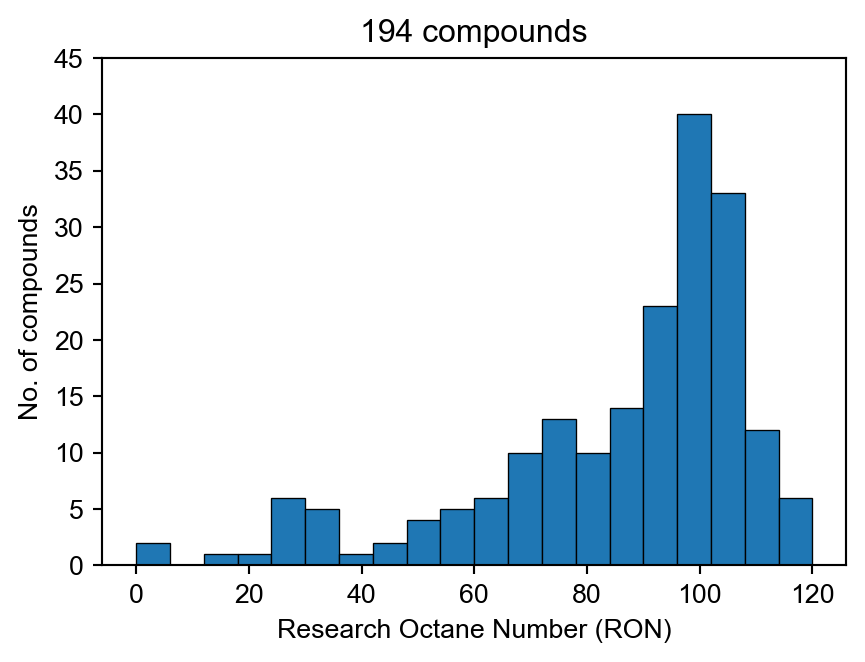

In [5]:
plot_histogram(Y, xlabel="Research Octane Number (RON)")

Let us now compute the signaturizer descriptors:

In [6]:
sign = Signaturizer('B1') # Mechanism of action signaturizer
results = sign.predict(smiles)
D = results.signature

In [7]:
D.shape

(194, 128)

Let us split the data in training and validation sets:

In [8]:
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)

Now we want to select a subset of signatures that we will use to train the model.

In [5]:
regr = LinearRegression()

sfs = SequentialFeatureSelector(regr, n_features_to_select=15)

In [9]:
%%time
sfs.fit(D_train, y_train)

Wall time: 52.1 s


SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=15)

In [10]:
D_train.shape

(155, 128)

Now we use the selected descriptors to train a Support Vector Regressor (SVR) from the `sklearn` package.

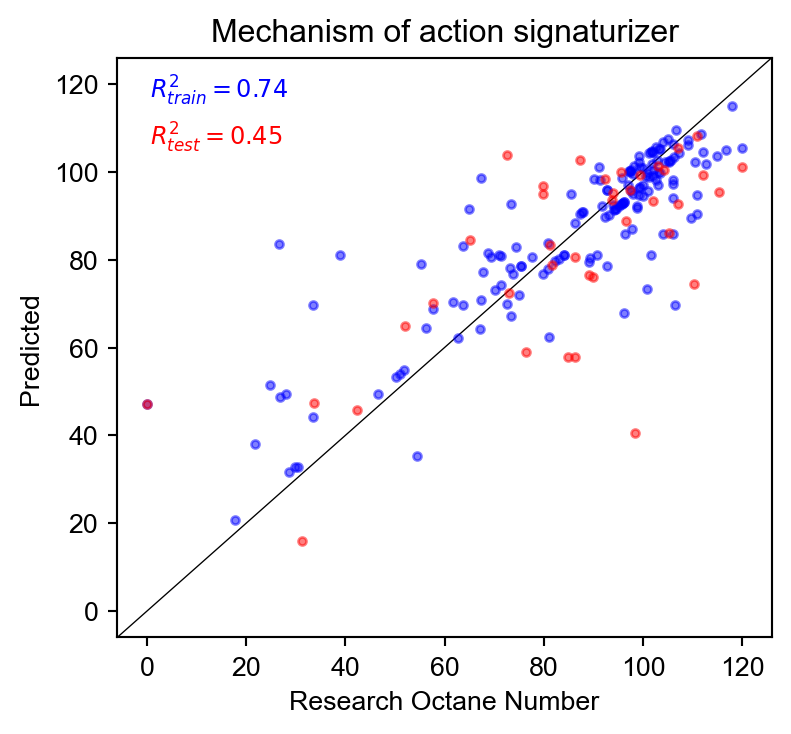

In [11]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Research Octane Number", title='Mechanism of action signaturizer', savetitle='./results/CC/RON_B1signature.svg') 

Let us try other signaturizers:

In [12]:
sign = Signaturizer('A1') # 2D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(194, 128)


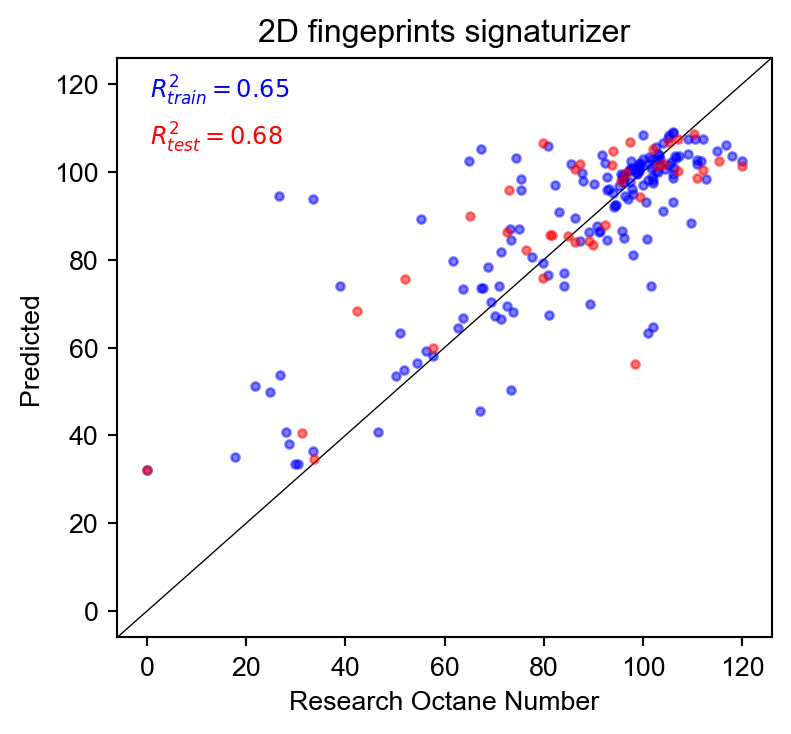

In [13]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Research Octane Number", title='2D fingeprints signaturizer', savetitle='./results/CC/RON_A1signature.svg') 

In [14]:
sign = Signaturizer('A2') # 3D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(194, 128)


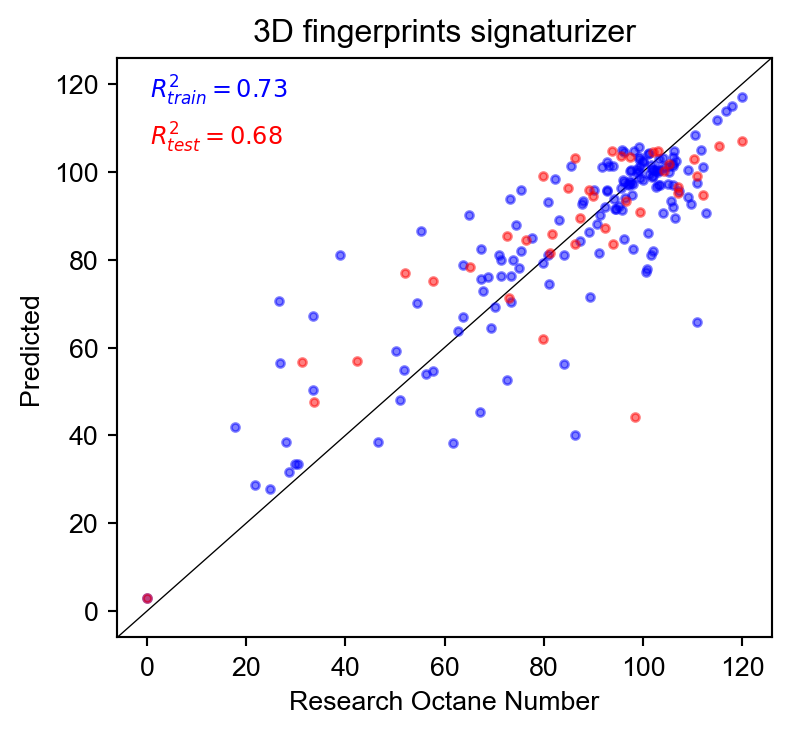

In [15]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Research Octane Number", title='3D fingerprints signaturizer', savetitle='./results/CC/RON_A2signature.svg') 

In [16]:
sign = Signaturizer('A5') # Physicochemistry signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(194, 128)


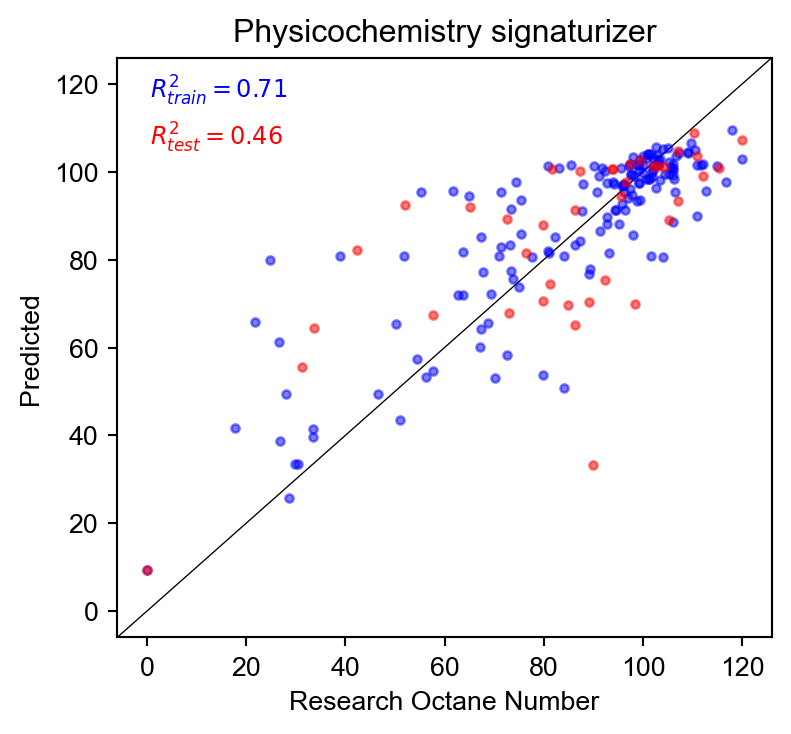

In [17]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Research Octane Number", title="Physicochemistry signaturizer", savetitle='./results/CC/RON_A5signature.svg') 

In [18]:
sign = Signaturizer('D5') # Cell-bioassay signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(194, 128)


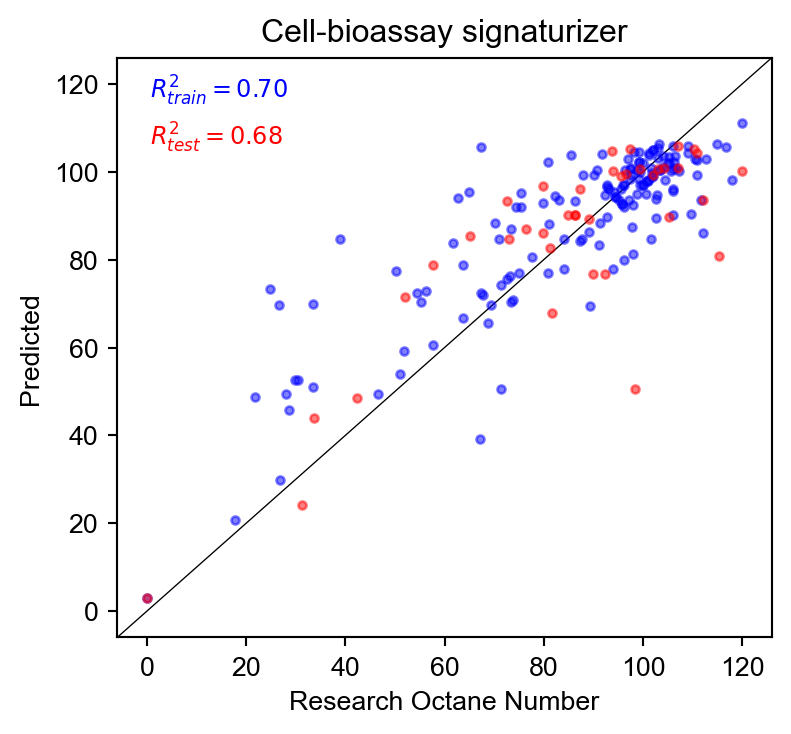

In [19]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Research Octane Number", title="Cell-bioassay signaturizer", savetitle='./results/CC/RON_D5signature.svg') 

In [20]:
sign = Signaturizer('B4') # Binding signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(194, 128)


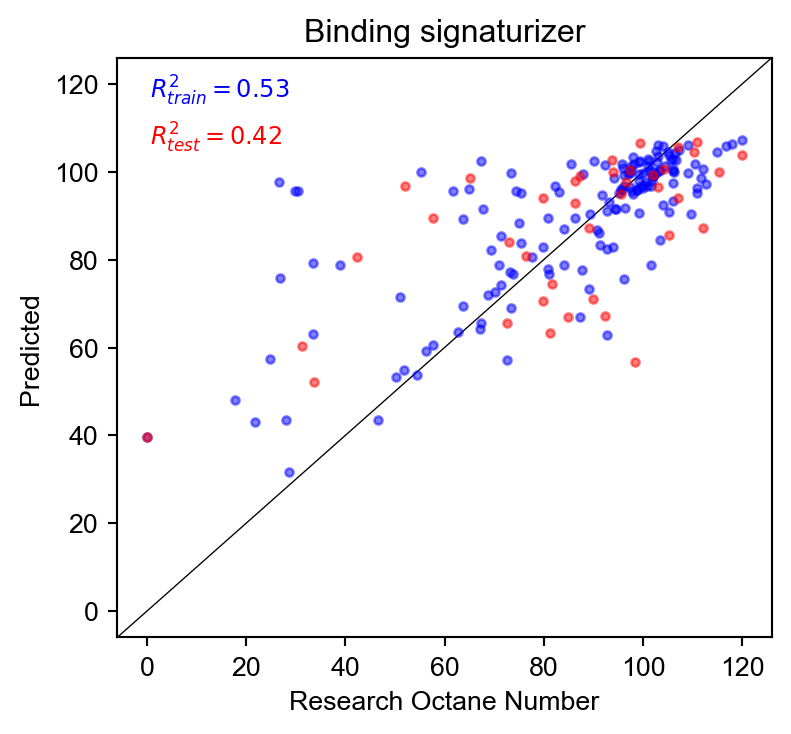

In [21]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Research Octane Number", title="Binding signaturizer", savetitle='./results/CC/RON_B4signature.svg') 

## Cetane Number (CN)

In [22]:
df = pd.read_csv("./data/data_CN.csv")
smiles = df.Smiles
Y = df.CN
print(len(smiles))

545


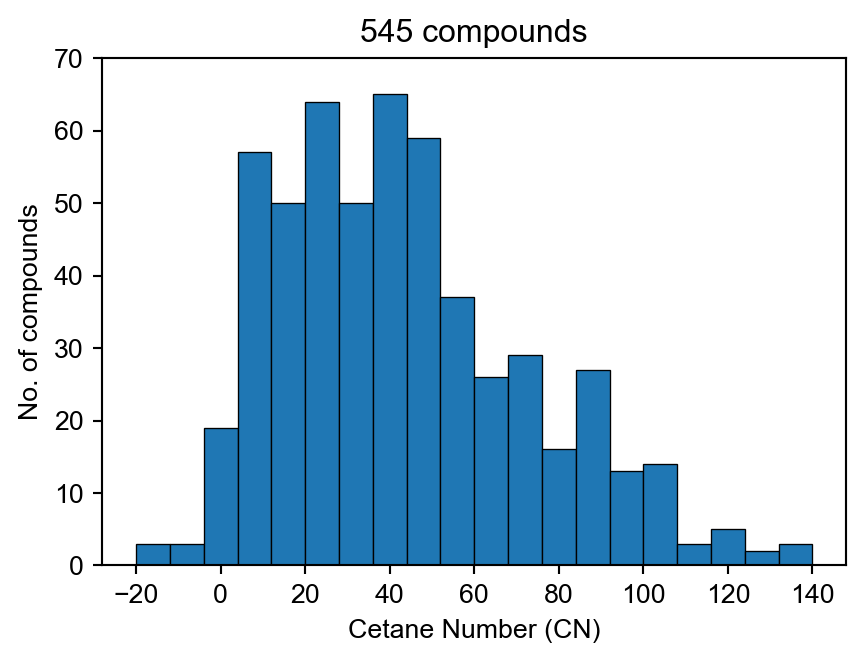

In [23]:
plot_histogram(Y, xlabel="Cetane Number (CN)")

In [24]:
sign = Signaturizer('B1') # Mechanism of action signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(545, 128)


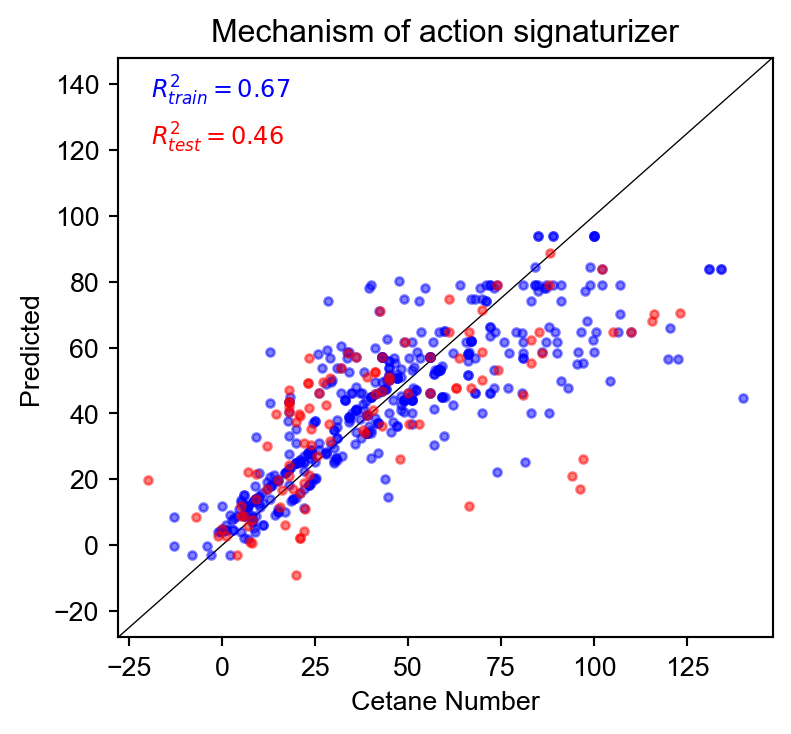

In [25]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Cetane Number", title='Mechanism of action signaturizer', savetitle='./results/CC/CN_B1signature.svg') 

In [26]:
sign = Signaturizer('A1') # 2D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(545, 128)


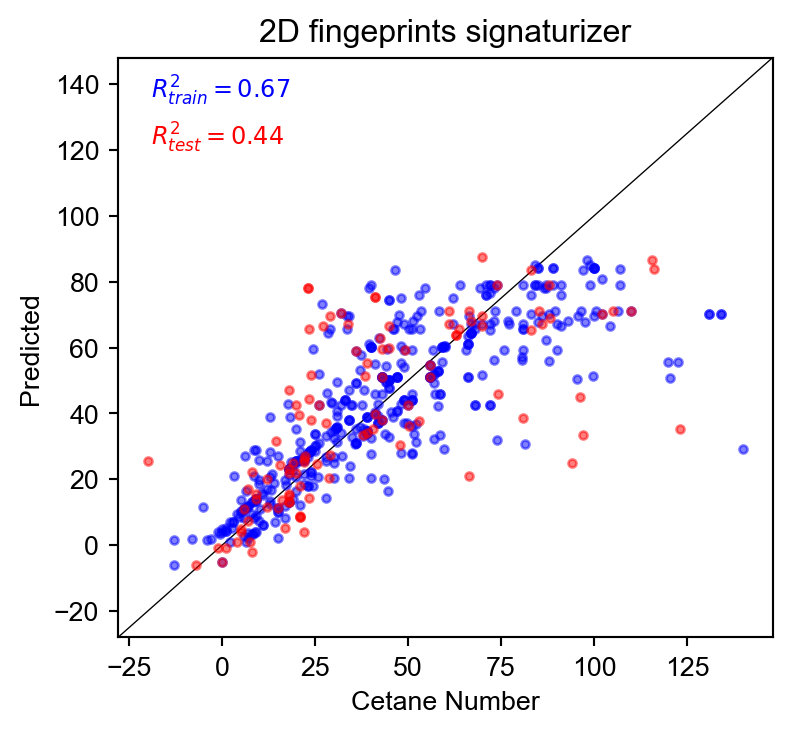

In [27]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Cetane Number", title='2D fingeprints signaturizer', savetitle='./results/CC/CN_A1signature.svg') 

In [28]:
sign = Signaturizer('A2') # 3D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(545, 128)


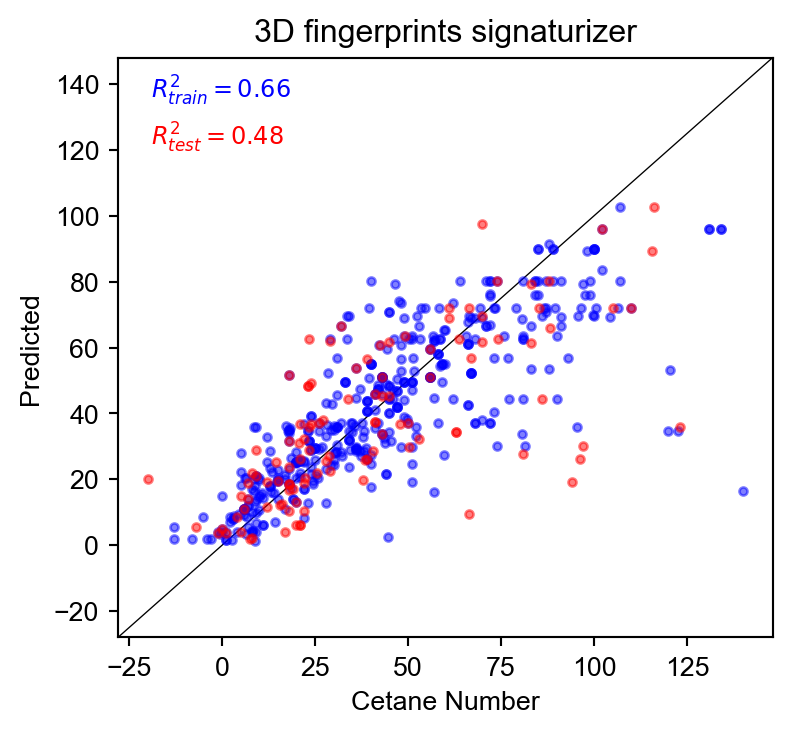

In [29]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Cetane Number", title='3D fingerprints signaturizer', savetitle='./results/CC/CN_A2signature.svg') 

In [30]:
sign = Signaturizer('A5') # Physicochemistry signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(545, 128)


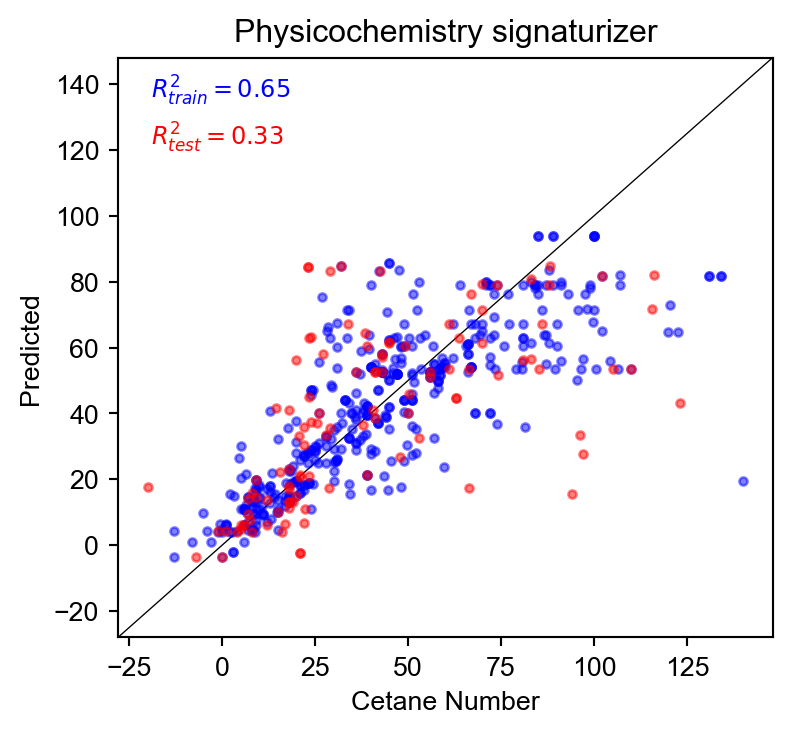

In [31]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Cetane Number", title="Physicochemistry signaturizer", savetitle='./results/CC/CN_A5signature.svg') 

In [32]:
sign = Signaturizer('D5') # Cell-bioassay signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(545, 128)


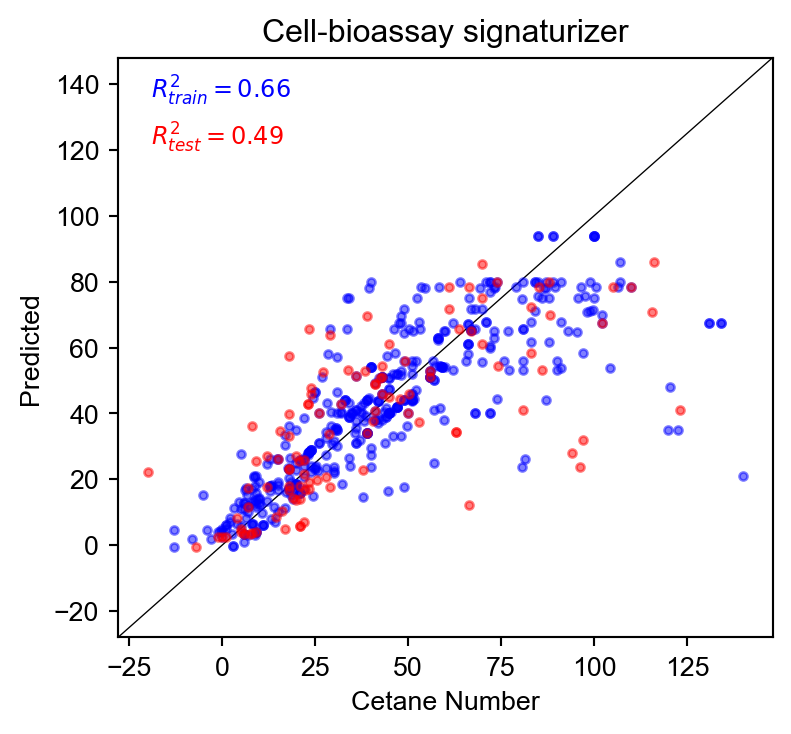

In [33]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Cetane Number", title="Cell-bioassay signaturizer", savetitle='./results/CC/CN_D5signature.svg') 

In [34]:
sign = Signaturizer('B4') # Binding signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(545, 128)


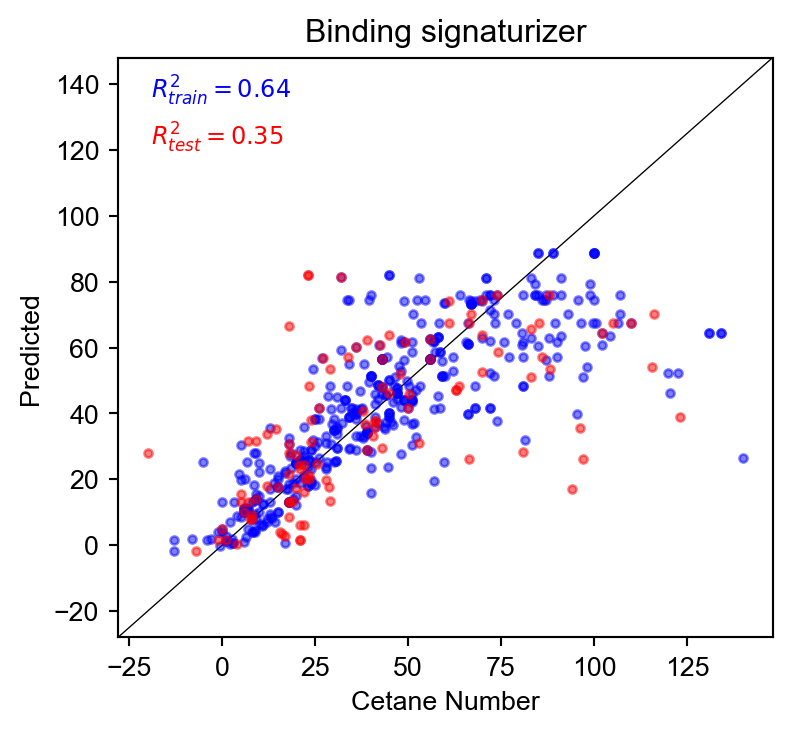

In [35]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Cetane Number", title="Binding signaturizer", savetitle='./results/CC/CN_B4signature.svg') 

## Yield Sooting Index

In [36]:
df = pd.read_csv("./data/data_YSI.csv")
smiles = df.Smiles
Y = df.YSI
print(len(smiles))

610


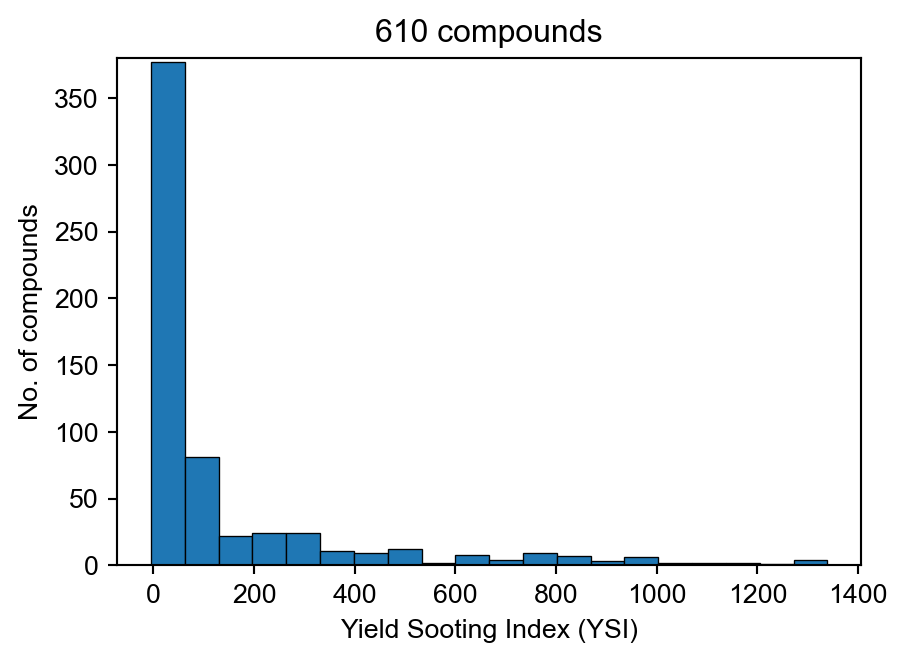

In [37]:
plot_histogram(Y, xlabel="Yield Sooting Index (YSI)")

In [38]:
sign = Signaturizer('B1') # Mechanism of action signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(610, 128)


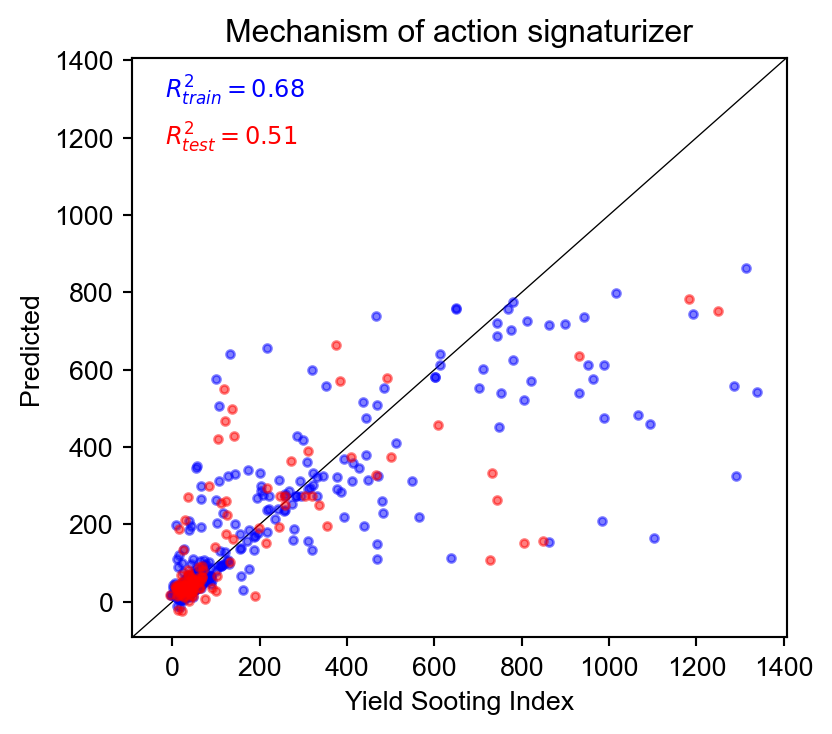

In [39]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=500, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Yield Sooting Index", title='Mechanism of action signaturizer', savetitle='./results/CC/YSI_B1signature.svg') 

In [40]:
sign = Signaturizer('A1') # 2D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(610, 128)


In [41]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=500, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Yield Sooting Index", title='2D fingeprints signaturizer', savetitle='./results/CC/YSI_A1signature.svg') 

In [42]:
sign = Signaturizer('A2') # 3D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(610, 128)


In [43]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=500, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Yield Sooting Index", title='3D fingerprints signaturizer', savetitle='./results/CC/YSI_A2signature.svg') 

In [44]:
sign = Signaturizer('A5') # Physicochemistry signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(610, 128)


In [45]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=500, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Yield Sooting Index", title="Physicochemistry signaturizer", savetitle='./results/CC/YSI_A5signature.svg') 

In [46]:
sign = Signaturizer('D5') # Cell-bioassay signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(610, 128)


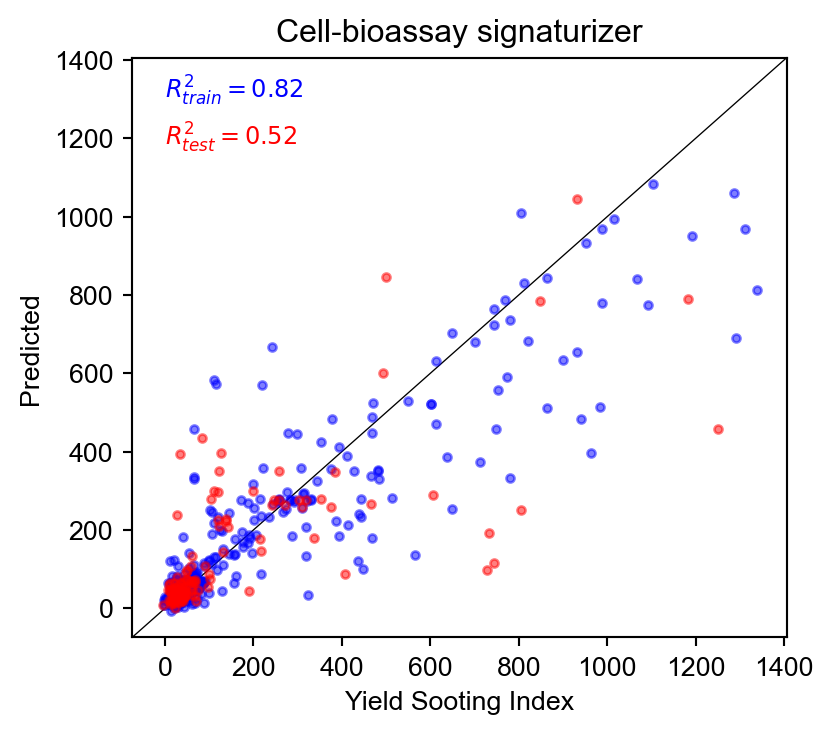

In [47]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=500, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Yield Sooting Index", title="Cell-bioassay signaturizer", savetitle='./results/CC/YSI_D5signature.svg') 

In [48]:
sign = Signaturizer('B4') # Binding signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(610, 128)


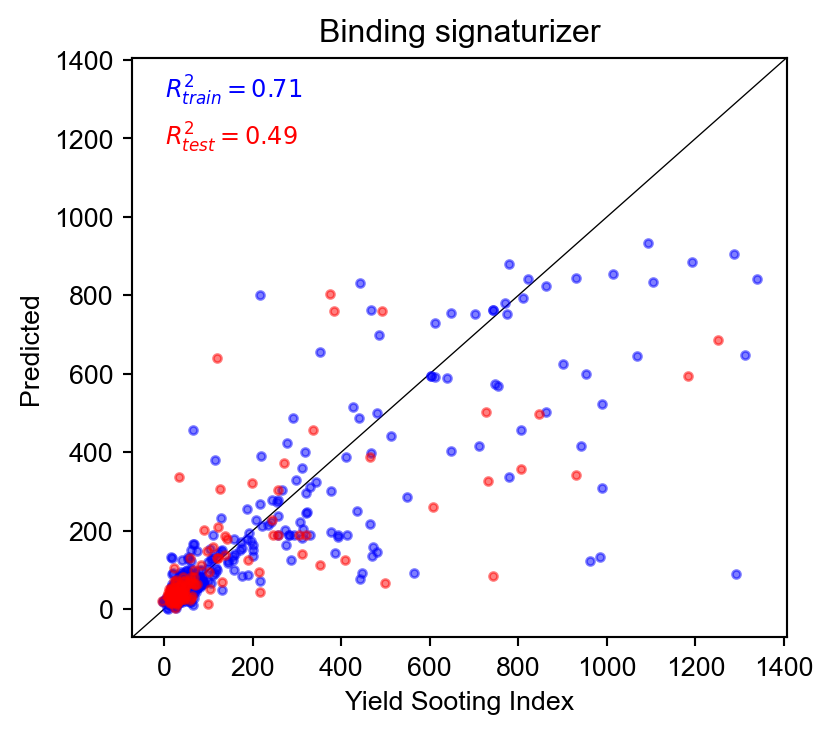

In [49]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=500, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Yield Sooting Index", title="Binding signaturizer", savetitle='./results/CC/YSI_B4signature.svg') 

##  Melting Point (MP)

In [48]:
df = pd.read_csv("./data/data_MP.csv")
smiles = df.Smiles
Y = df.mpC
print(len(smiles))

27976


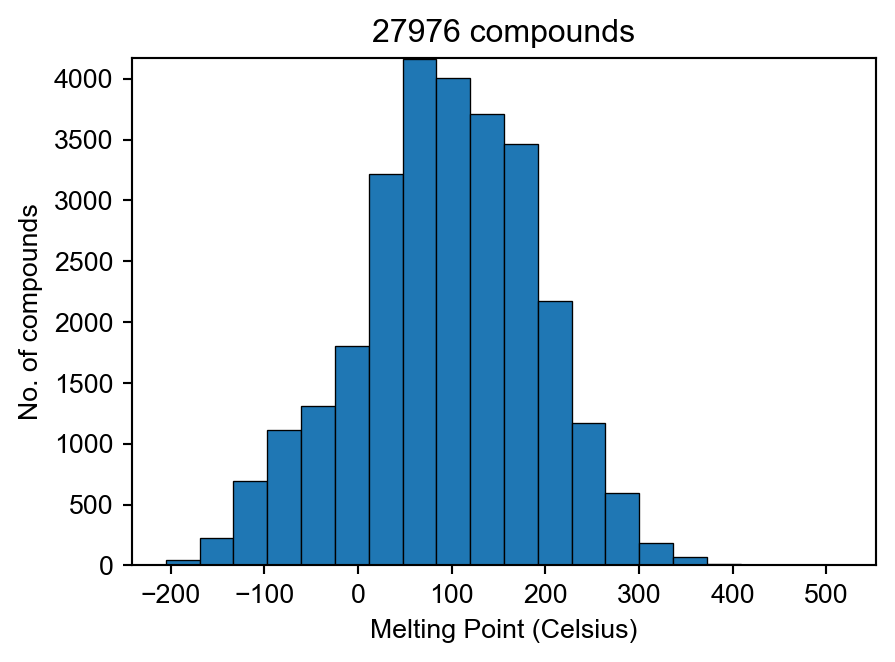

In [49]:
plot_histogram(Y, xlabel="Melting Point (Celsius)")

In [50]:
%%time

sign = Signaturizer('B1') # Mechanism of action signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(27976, 128)
Wall time: 5min 36s


In [51]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=500, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Melting Point (Celsius)", title='Mechanism of action signaturizer', savetitle='./results/CC/MP_B1signature.svg') 

In [52]:
%%time

sign = Signaturizer('A1') # 2D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(27976, 128)
Wall time: 5min 24s


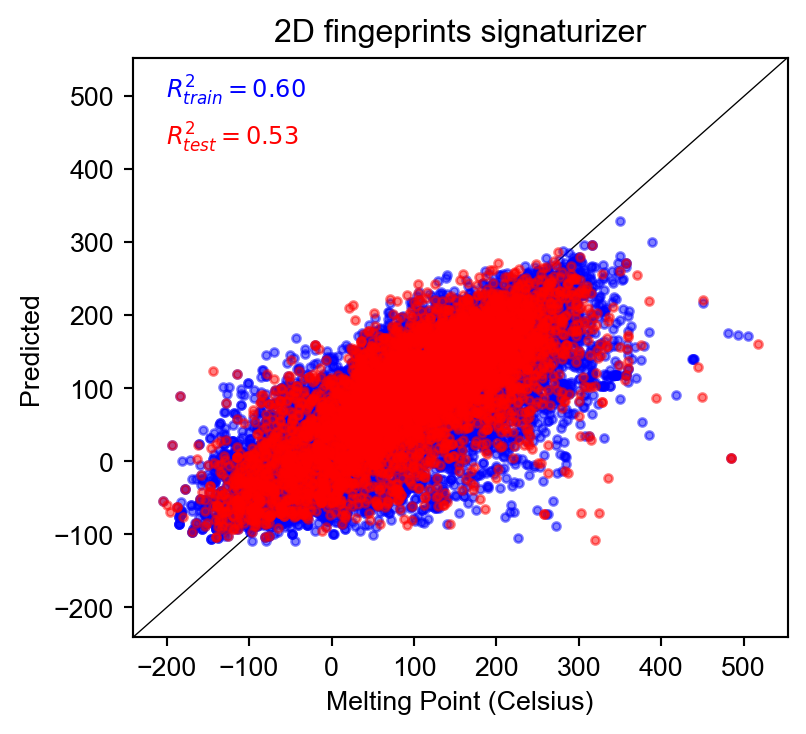

In [53]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=500, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Melting Point (Celsius)", title='2D fingeprints signaturizer', savetitle='./results/CC/MP_A1signature.svg') 

In [54]:
%%time

sign = Signaturizer('A2') # 3D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(27976, 128)
Wall time: 5min 21s


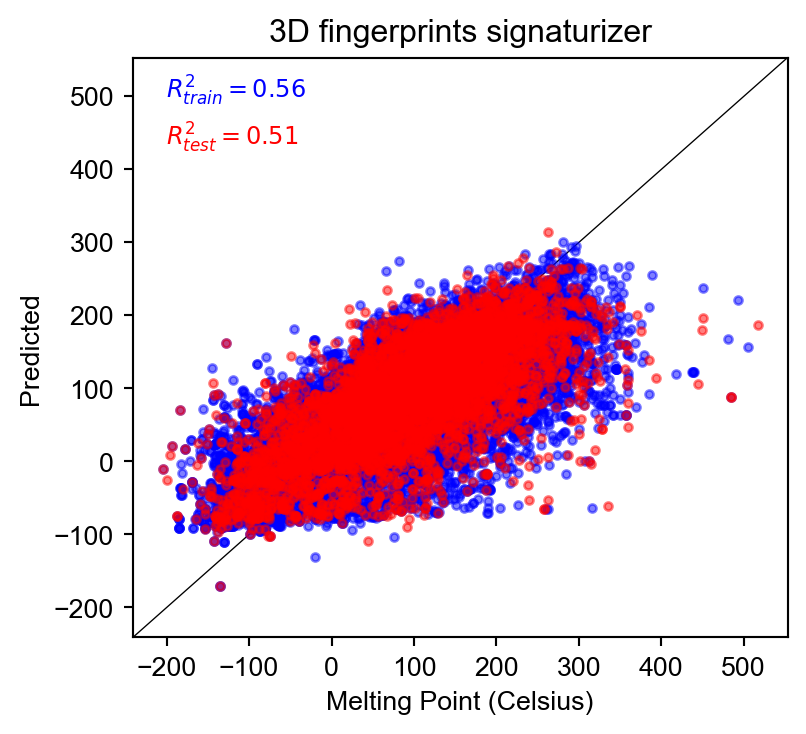

In [55]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=500, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Melting Point (Celsius)", title='3D fingerprints signaturizer', savetitle='./results/CC/MP_A2signature.svg') 

In [56]:
%%time

sign = Signaturizer('A5') # Physicochemistry signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(27976, 128)
Wall time: 5min 6s


In [57]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=500, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Melting Point (Celsius)", title="Physicochemistry signaturizer", savetitle='./results/CC/MP_A5signature.svg') 

In [58]:
%%time

sign = Signaturizer('D5') # Cell-bioassay signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(27976, 128)
Wall time: 5min 32s


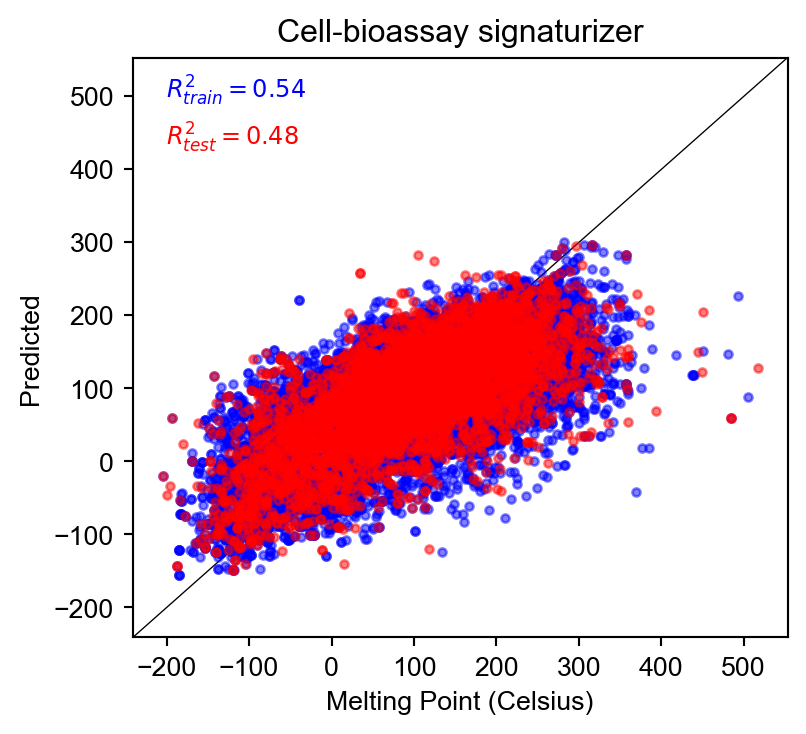

In [59]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=500, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Melting Point (Celsius)", title="Cell-bioassay signaturizer", savetitle='./results/CC/MP_D5signature.svg') 

In [60]:
%%time

sign = Signaturizer('B4') # Binding signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(27976, 128)
Wall time: 5min 6s


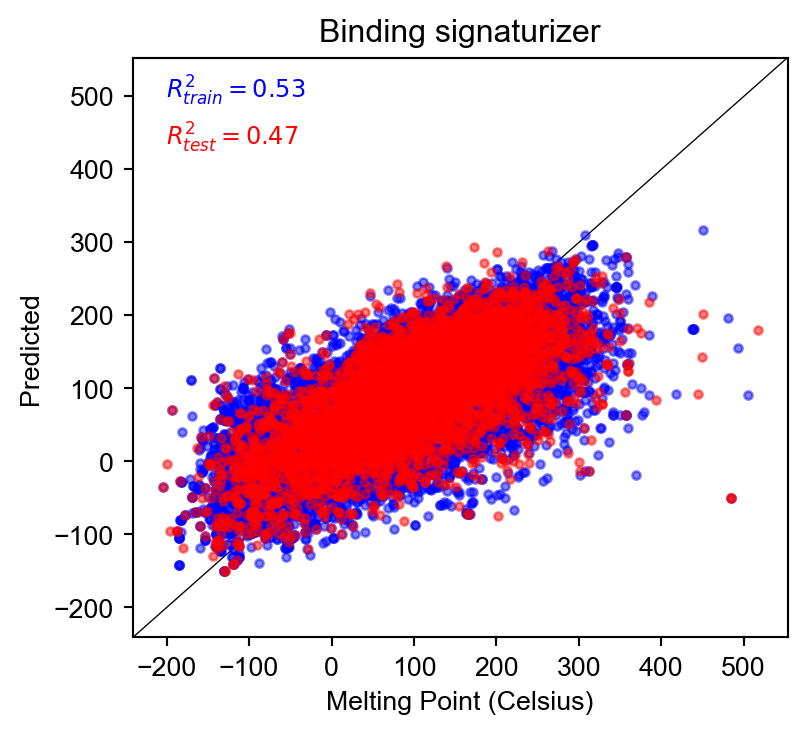

In [61]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=500, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Melting Point (Celsius)", title="Binding signaturizer", savetitle='./results/CC/MP_B4signature.svg') 

## Flash Point (FP)

In [6]:
df = pd.read_csv("./data/data_FP.csv")
smiles = df.Smiles
Y = df.FP
print(len(smiles))

631


In [7]:
plot_histogram(Y, xlabel="Flash Point (Celsius)")

In [8]:
sign = Signaturizer('B1') # Mechanism of action signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(631, 128)


In [9]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=300, epsilon=5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Flash Point (Celsius)", title='Mechanism of action signaturizer', savetitle='./results/CC/FP_B1signature.svg') 

In [10]:
sign = Signaturizer('A1') # 2D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(631, 128)


In [11]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=300, epsilon=5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Flash Point (Celsius)", title='2D fingeprints signaturizer', savetitle='./results/CC/FP_A1signature.svg') 

In [12]:
sign = Signaturizer('A2') # 3D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(631, 128)


In [13]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=300, epsilon=5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Flash Point (Celsius)", title='3D fingerprints signaturizer', savetitle='./results/CC/FP_A2signature.svg') 

In [14]:
sign = Signaturizer('A5') # Physicochemistry signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(631, 128)


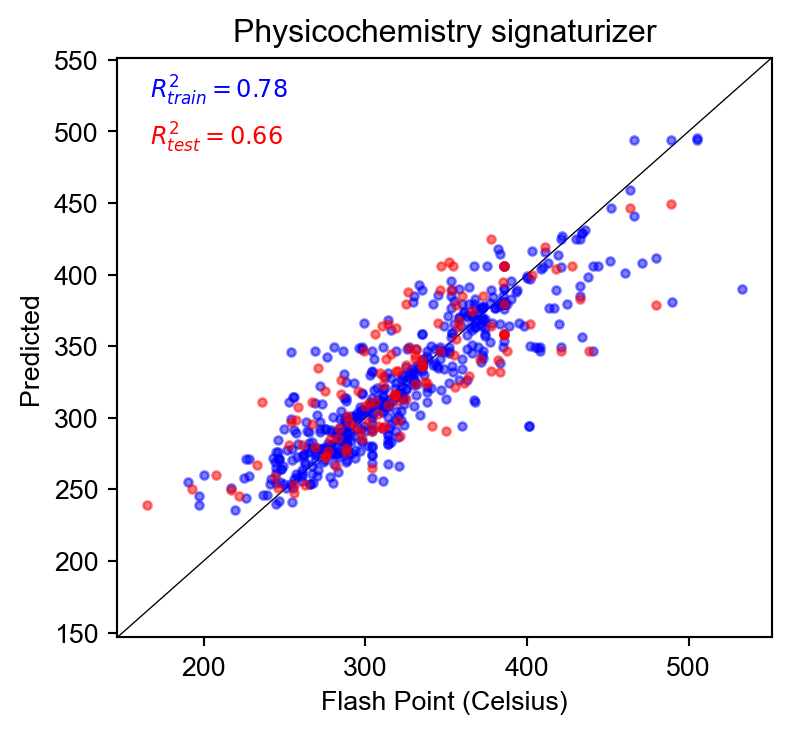

In [15]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=300, epsilon=5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Flash Point (Celsius)", title="Physicochemistry signaturizer", savetitle='./results/CC/FP_A5signature.svg') 

In [16]:
sign = Signaturizer('D5') # Cell-bioassay signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(631, 128)


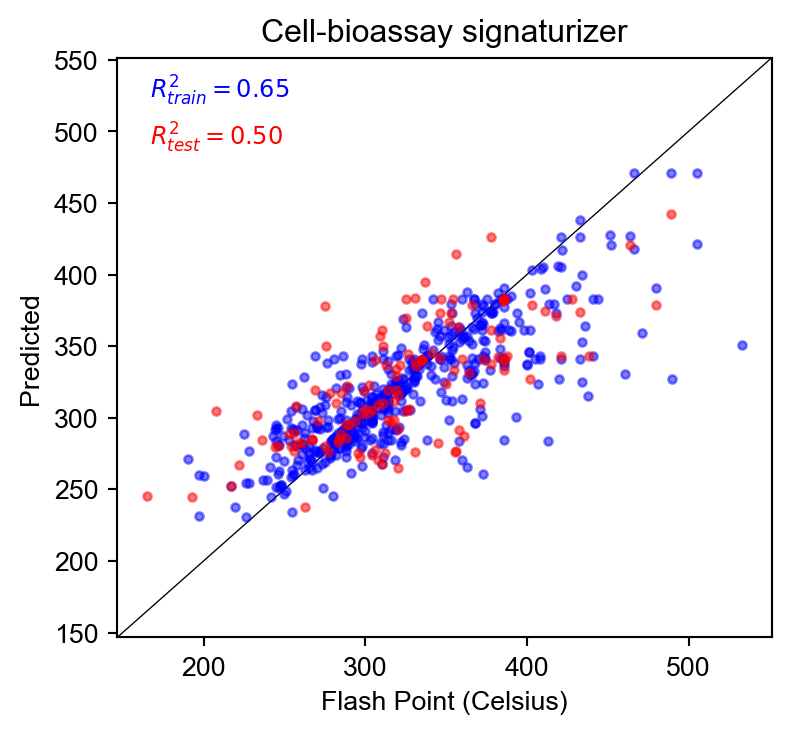

In [17]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=300, epsilon=5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Flash Point (Celsius)", title="Cell-bioassay signaturizer", savetitle='./results/CC/FP_D5signature.svg') 

In [18]:
sign = Signaturizer('B4') # Binding signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(631, 128)


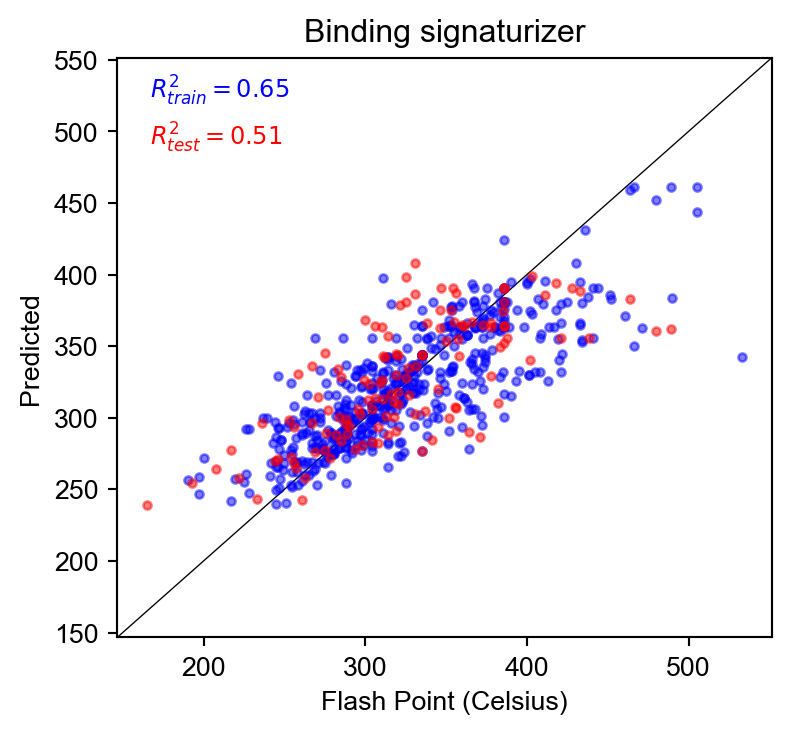

In [19]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=300, epsilon=5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Flash Point (Celsius)", title="Binding signaturizer", savetitle='./results/CC/FP_B4signature.svg') 

## Histamine receptor pKi

In [20]:
df = pd.read_csv("./data/data_H1.csv")
Y = df.pKi
smiles = df.Smiles
print(len(smiles))

1214


In [21]:
plot_histogram(Y, xlabel="pKi binding to histamine H1 receptor")

In [22]:
sign = Signaturizer('B1') # Mechanism of action signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1214, 128)


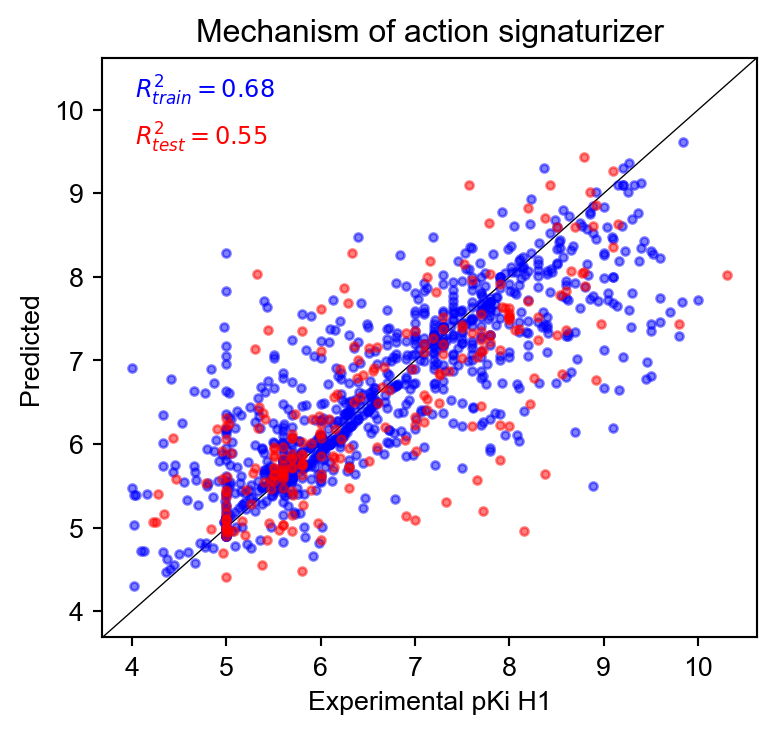

In [23]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=10, epsilon=.1)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel='Experimental pKi H1', title='Mechanism of action signaturizer', savetitle='./results/CC/H1_B1signature.svg') 

In [24]:
sign = Signaturizer('A1') # 2D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1214, 128)


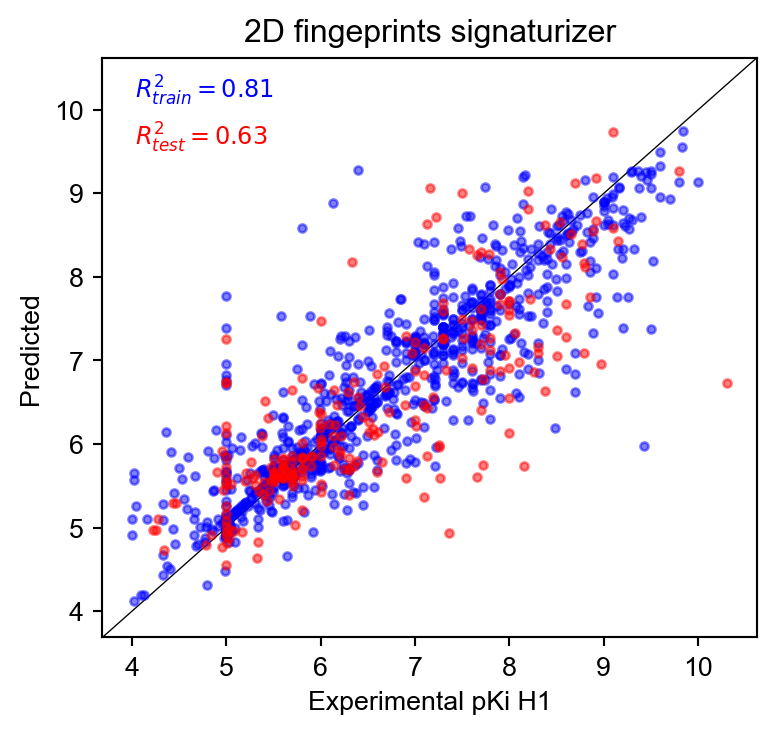

In [25]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=10, epsilon=.1)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel='Experimental pKi H1', title='2D fingeprints signaturizer', savetitle='./results/CC/H1_A1signature.svg') 

In [26]:
sign = Signaturizer('A2') # 3D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1214, 128)


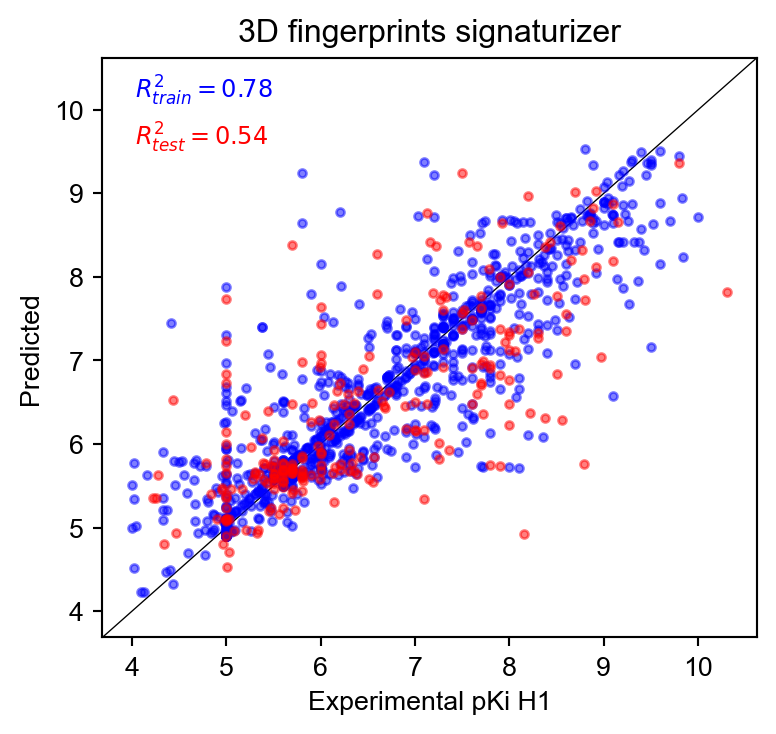

In [27]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=10, epsilon=.1)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel='Experimental pKi H1', title='3D fingerprints signaturizer', savetitle='./results/CC/H1_A2signature.svg') 

In [28]:
sign = Signaturizer('A5') # Physicochemistry signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1214, 128)


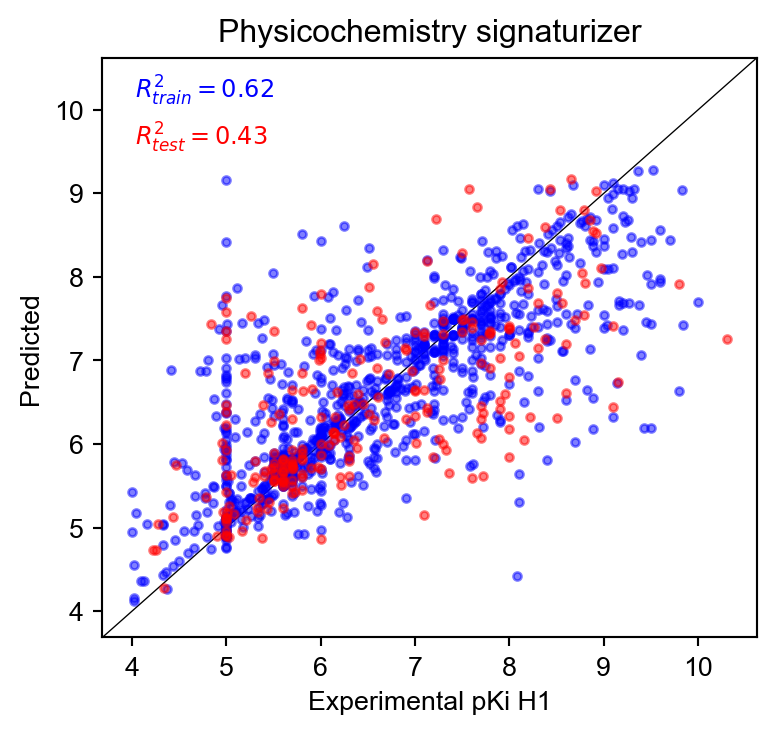

In [29]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=10, epsilon=.1)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel='Experimental pKi H1', title="Physicochemistry signaturizer", savetitle='./results/CC/H1_A5signature.svg') 

In [30]:
sign = Signaturizer('D5') # Cell-bioassay signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1214, 128)


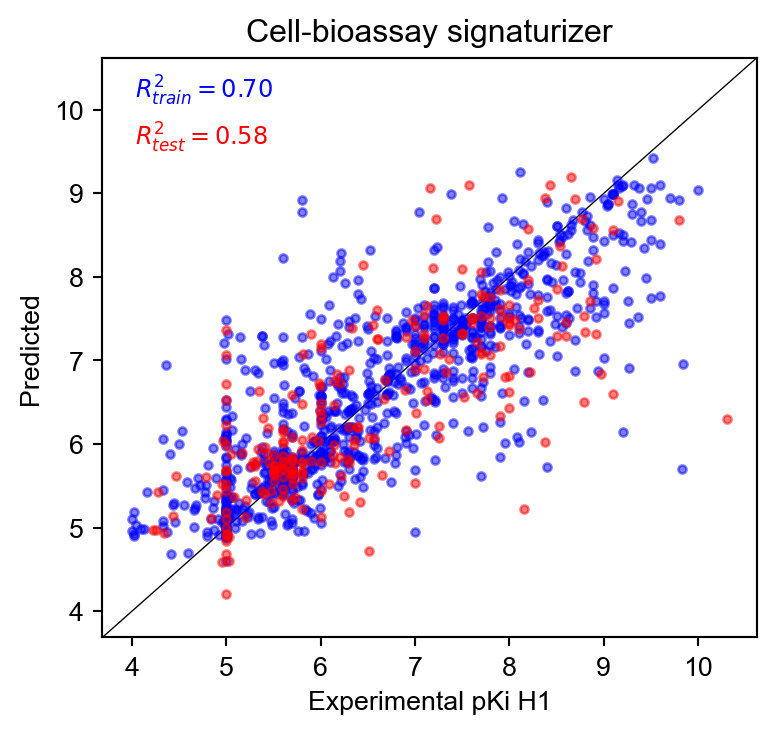

In [31]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=10, epsilon=.1)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel='Experimental pKi H1', title="Cell-bioassay signaturizer", savetitle='./results/CC/H1_D5signature.svg') 

In [32]:
sign = Signaturizer('B4') # Binding signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1214, 128)


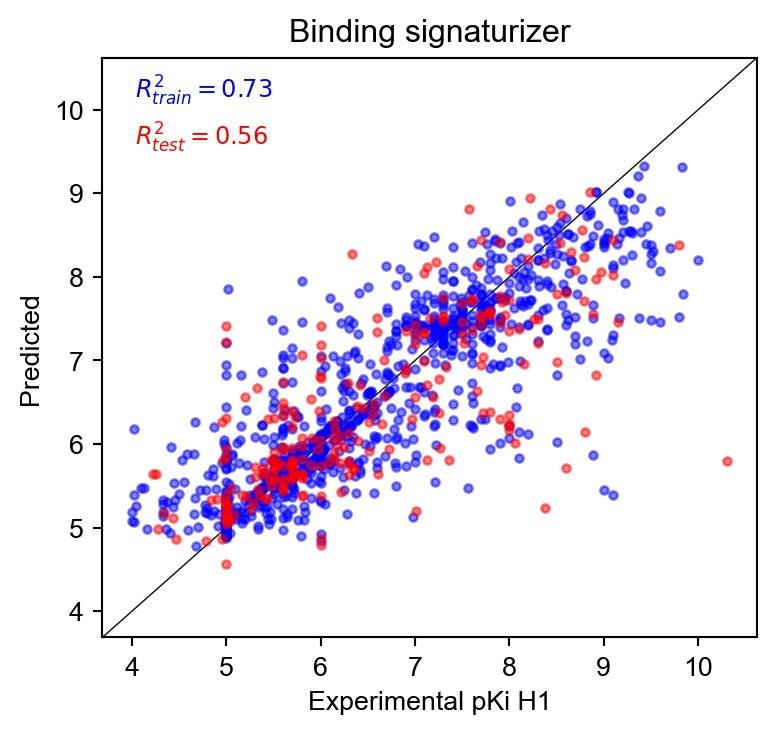

In [33]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=10, epsilon=.1)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel='Experimental pKi H1', title="Binding signaturizer", savetitle='./results/CC/H1_B4signature.svg') 

## Muscarinic receptor pKi

In [34]:
df = pd.read_csv("./data/data_M2.csv")
Y = df.pKi
smiles = df.Smiles
print(len(smiles))

1145


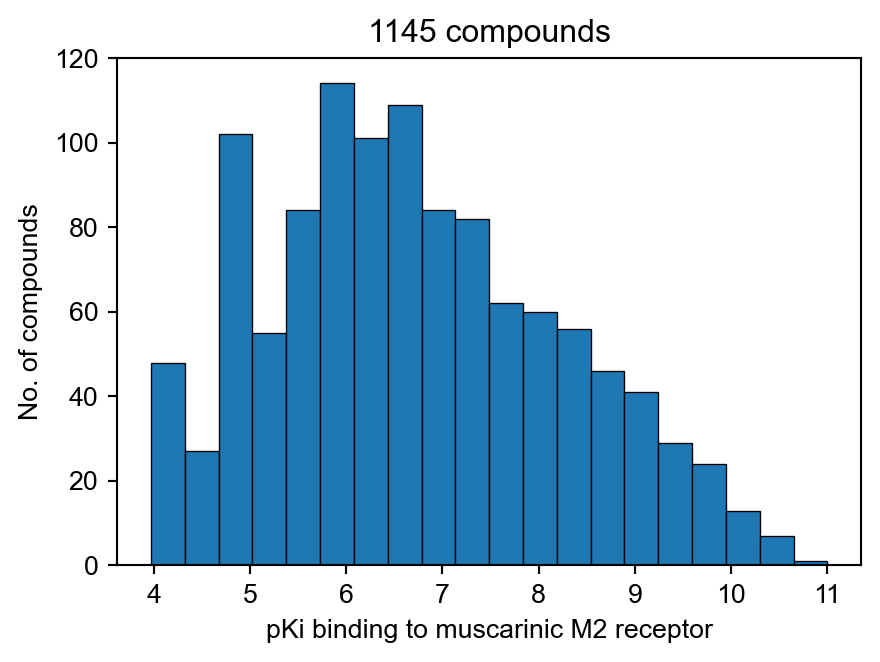

In [35]:
plot_histogram(Y, xlabel="pKi binding to muscarinic M2 receptor")

In [36]:
sign = Signaturizer('B1') # Mechanism of action signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1145, 128)


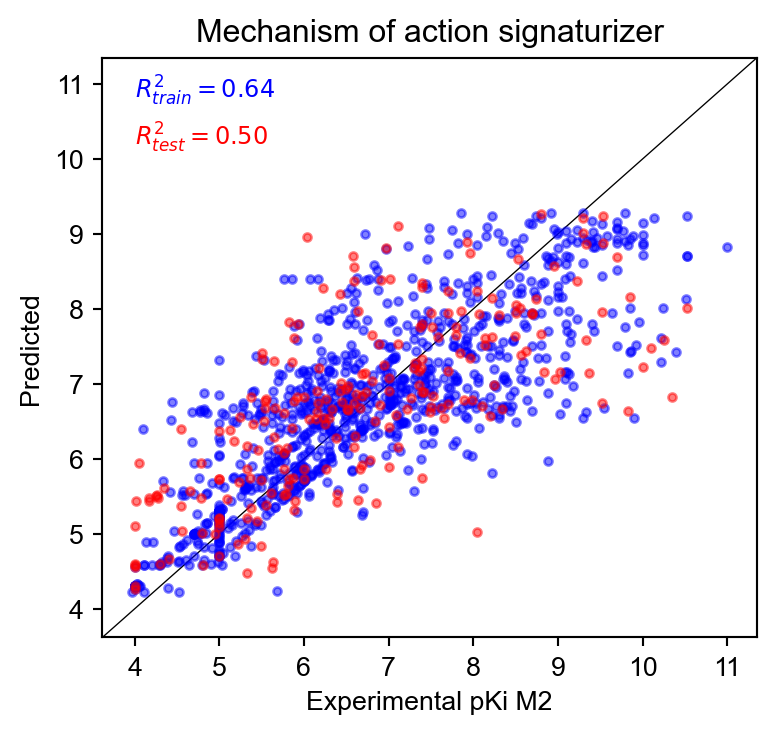

In [37]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=10, epsilon=.3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel='Experimental pKi M2', title="Mechanism of action signaturizer", savetitle='./results/CC/M2_B1signature.svg') 

In [38]:
sign = Signaturizer('A1') # 2D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1145, 128)


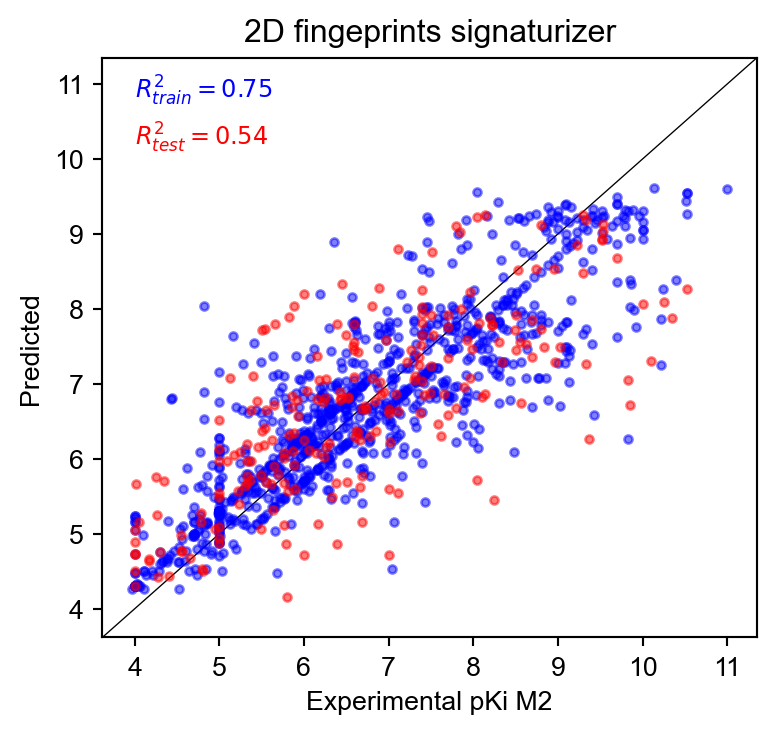

In [39]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=10, epsilon=.3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Experimental pKi M2", title='2D fingeprints signaturizer', savetitle='./results/CC/M2_A1signature.svg') 

In [40]:
sign = Signaturizer('A2') # 3D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1145, 128)


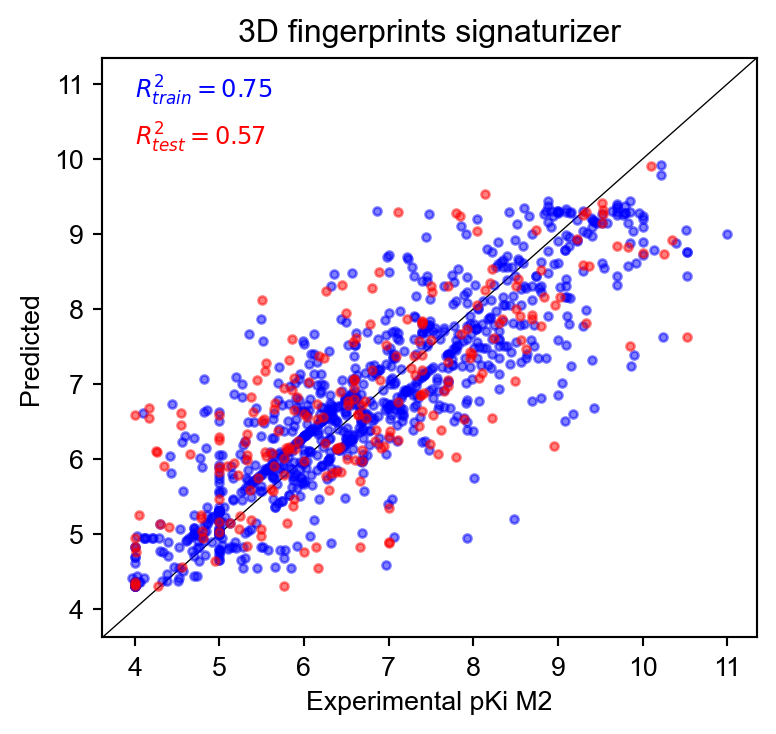

In [41]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=10, epsilon=.3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Experimental pKi M2", title='3D fingerprints signaturizer', savetitle='./results/CC/M2_A2signature.svg') 

In [42]:
sign = Signaturizer('A5') # Physicochemistry signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1145, 128)


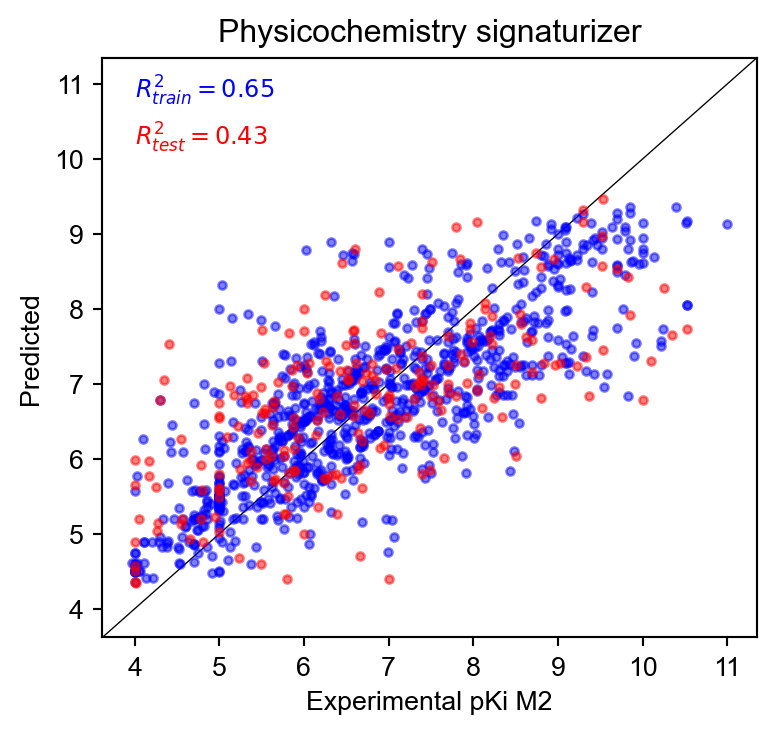

In [43]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=3, epsilon=.5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Experimental pKi M2", title="Physicochemistry signaturizer", savetitle='./results/CC/M2_A5signature.svg') 

In [44]:
sign = Signaturizer('D5') # Cell-bioassay signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1145, 128)


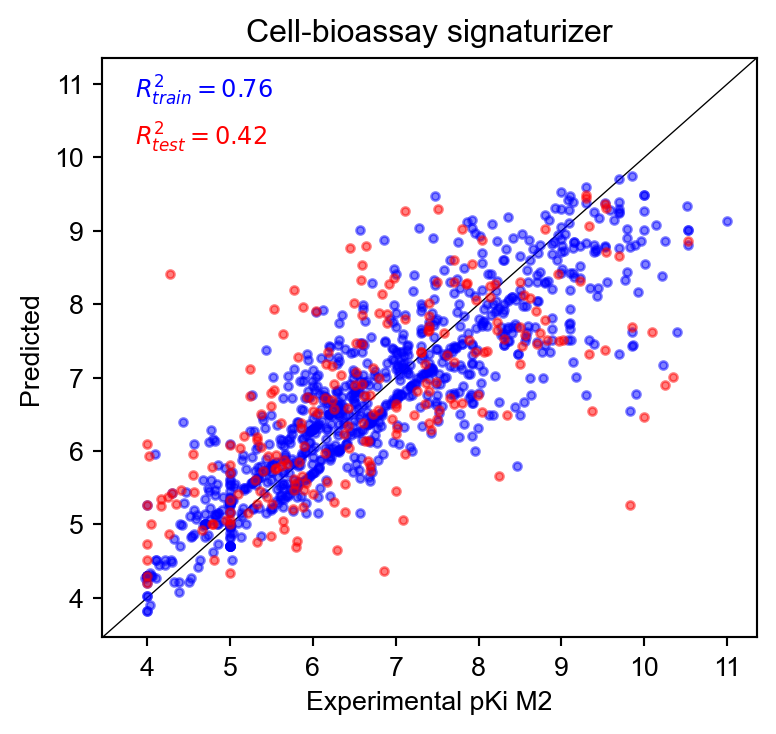

In [45]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=10, epsilon=.3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Experimental pKi M2", title="Cell-bioassay signaturizer", savetitle='./results/CC/M2_D5signature.svg') 

In [46]:
sign = Signaturizer('B4') # Binding signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1145, 128)


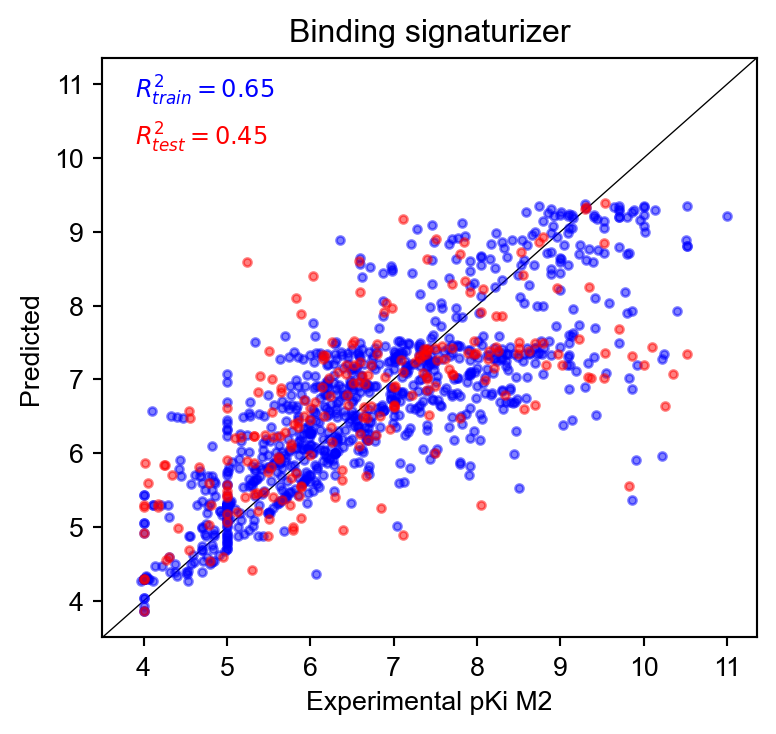

In [47]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=10, epsilon=.3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Experimental pKi M2", title="Binding signaturizer", savetitle='./results/CC/M2_B4signature.svg') 